In [1]:
# common 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# ml preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# algo
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv('../datasets/house_pricing.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        814 non-null    object 
 1   Type        814 non-null    object 
 2   Beds        814 non-null    int64  
 3   Baths       814 non-null    int64  
 4   SquareFeet  814 non-null    int64  
 5   Price       814 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 38.3+ KB


,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [4]:
x=df[['Beds','Baths','SquareFeet']]
y=df['Price']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0)

In [5]:
m0=LinearRegression()
m0.fit(xtrain,ytrain)
m0.score(xtest,ytest)*100

87.86128521017118

In [6]:
m1=DecisionTreeRegressor()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest)*100

72.55681155064987

In [7]:
m2=RandomForestRegressor()
m2.fit(xtrain,ytrain)
m2.score(xtest,ytest)*100

78.66741123342378

In [8]:
m3=KNeighborsRegressor()
m3.fit(xtrain,ytrain)
m3.score(xtest,ytest)*100

82.87029914478055

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
data=[]

In [11]:
# linear reg
scores = cross_val_score(m0,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')
scores = scores * 100
data.append({
    'algo':'linear reg.',
    'cv0': scores[0],
    'cv1': scores[1],
    'cv2': scores[2],
    'cv3': scores[3],
})
data

mean score => 70.73, cross val => [87.36574128 75.78184402 74.70608302 45.08534347]


[{'algo': 'linear reg.',
  'cv0': 87.36574127649914,
  'cv1': 75.78184402195292,
  'cv2': 74.70608301656637,
  'cv3': 45.08534347105299}]

In [12]:
scores = cross_val_score(m1,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')
scores = scores * 100
data.append({
    'algo':'decision tree',
    'cv0': scores[0],
    'cv1': scores[1],
    'cv2': scores[2],
    'cv3': scores[3],
})
data

mean score => 57.03, cross val => [70.31708185 55.54999114 57.4349625  44.82421322]


[{'algo': 'linear reg.',
  'cv0': 87.36574127649914,
  'cv1': 75.78184402195292,
  'cv2': 74.70608301656637,
  'cv3': 45.08534347105299},
 {'algo': 'decision tree',
  'cv0': 70.31708184758357,
  'cv1': 55.549991140376086,
  'cv2': 57.43496250295721,
  'cv3': 44.8242132221745}]

In [13]:
# random forest
scores = cross_val_score(m2,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')
scores = scores * 100
data.append({
    'algo':'random forest',
    'cv0': scores[0],
    'cv1': scores[1],
    'cv2': scores[2],
    'cv3': scores[3],
})
data

mean score => 65.72, cross val => [74.32378905 66.43322414 67.95459045 54.17849523]


[{'algo': 'linear reg.',
  'cv0': 87.36574127649914,
  'cv1': 75.78184402195292,
  'cv2': 74.70608301656637,
  'cv3': 45.08534347105299},
 {'algo': 'decision tree',
  'cv0': 70.31708184758357,
  'cv1': 55.549991140376086,
  'cv2': 57.43496250295721,
  'cv3': 44.8242132221745},
 {'algo': 'random forest',
  'cv0': 74.32378904992036,
  'cv1': 66.4332241359083,
  'cv2': 67.95459045125247,
  'cv3': 54.17849523108686}]

In [14]:
# nearest neighbor
scores = cross_val_score(m3,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')
scores = scores * 100
data.append({
    'algo':'knn',
    'cv0': scores[0],
    'cv1': scores[1],
    'cv2': scores[2],
    'cv3': scores[3],
})
data

mean score => 72.65, cross val => [82.73315368 72.27136026 74.2208122  61.38933171]


[{'algo': 'linear reg.',
  'cv0': 87.36574127649914,
  'cv1': 75.78184402195292,
  'cv2': 74.70608301656637,
  'cv3': 45.08534347105299},
 {'algo': 'decision tree',
  'cv0': 70.31708184758357,
  'cv1': 55.549991140376086,
  'cv2': 57.43496250295721,
  'cv3': 44.8242132221745},
 {'algo': 'random forest',
  'cv0': 74.32378904992036,
  'cv1': 66.4332241359083,
  'cv2': 67.95459045125247,
  'cv3': 54.17849523108686},
 {'algo': 'knn',
  'cv0': 82.73315368474647,
  'cv1': 72.27136026354582,
  'cv2': 74.22081219782439,
  'cv3': 61.38933170603549}]

In [15]:
# convert to data frame
cross_val_df = pd.DataFrame(data)
cross_val_df = cross_val_df.set_index('algo')
cross_val_df

,cv0,cv1,cv2,cv3
algo,,,,
linear reg.,87.365741,75.781844,74.706083,45.085343
decision tree,70.317082,55.549991,57.434963,44.824213
random forest,74.323789,66.433224,67.954590,54.178495
knn,82.733154,72.271360,74.220812,61.389332


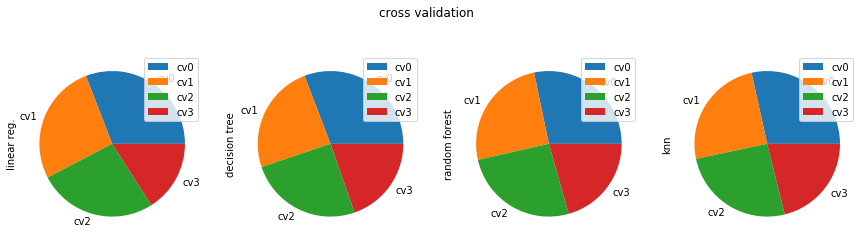

In [16]:
cross_val_df.T.plot(kind='pie',subplots=True,figsize=(15,4),title='cross validation')
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
scores = cross_val_score(m3,x,y,cv=4)
print(f'mean score => {scores.mean() *100:.2f}, cross val => {scores * 100}')

mean score => 72.65, cross val => [82.73315368 72.27136026 74.2208122  61.38933171]


In [32]:
params = {
    'n_neighbors':[3,5,7,8],
    'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'p':[2,3,4,5]
}
model = KNeighborsRegressor()
grid = GridSearchCV(model, param_grid=params, n_jobs=-1)

In [33]:
grid

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 8], 'p': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
grid.fit(x,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 8], 'p': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:

grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_algorithm', 'param_n_neighbors', 'param_p', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [37]:
grid.cv_results_.get('rank_test_score')

array([41, 41, 41, 41, 33, 34, 34, 34, 17, 17, 17, 17,  1,  1,  1,  1, 37,
       37, 37, 37, 29, 30, 30, 30, 13, 13, 13, 13,  5,  5,  5,  5, 45, 45,
       45, 45, 25, 26, 26, 26, 21, 21, 21, 21,  9,  9,  9,  9])

In [38]:
grid_scores_df = pd.DataFrame(grid.cv_results_)
grid_scores_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.320142,0.191187,0.011969,0.002821,ball_tree,3,2,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.710816,0.754191,0.572750,0.679291,0.077323,41
1,0.410897,0.058646,0.315824,0.032699,ball_tree,3,3,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.710816,0.754191,0.572750,0.679291,0.077323,41
2,0.062167,0.069886,0.269945,0.041406,ball_tree,3,4,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.710816,0.754191,0.572750,0.679291,0.077323,41
3,0.003656,0.000470,0.140291,0.093563,ball_tree,3,5,"{'algorithm': 'ball_tree', 'n_neighbors': 3, '...",0.710816,0.754191,0.572750,0.679291,0.077323,41
4,0.003327,0.000471,0.004654,0.000473,ball_tree,5,2,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.780354,0.758434,0.613246,0.717422,0.074138,33
5,0.004652,0.000472,0.011304,0.001243,ball_tree,5,3,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.780354,0.758434,0.613245,0.717422,0.074139,34
6,0.004653,0.001694,0.010306,0.000471,ball_tree,5,4,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.780354,0.758434,0.613245,0.717422,0.074139,34
7,0.003990,0.000002,0.012302,0.003390,ball_tree,5,5,"{'algorithm': 'ball_tree', 'n_neighbors': 5, '...",0.780354,0.758434,0.613245,0.717422,0.074139,34
8,0.003325,0.000470,0.005657,0.000462,ball_tree,7,2,"{'algorithm': 'ball_tree', 'n_neighbors': 7, '...",0.781584,0.759565,0.617008,0.719462,0.072936,17
9,0.004322,0.001243,0.010638,0.002488,ball_tree,7,3,"{'algorithm': 'ball_tree', 'n_neighbors': 7, '...",0.781584,0.759565,0.617008,0.719462,0.072936,17
